# Monolayer with Spin Orbit Coupling

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
from pauli_matrices import tau_0, tau_z, sigma_0, tau_x, sigma_z, sigma_x, sigma_y
plt.rcParams.update({
  "text.usetex": True,
})

## Diagonalization

In [2]:
def get_Hamiltonian(k_x, k_y, mu, B, Delta, phi_x, gamma, Lambda):
    """Return the Hamiltonian for a given k."""
    chi_k_plus = gamma * ( (k_x + phi_x)**2 + k_y**2) - mu
    chi_k_minus = gamma * ( (-k_x + phi_x)**2 + k_y**2 ) - mu
    return 1/2 * ( chi_k_plus * np.kron( ( tau_0 + tau_z )/2, sigma_0)
                   - chi_k_minus * np.kron( ( tau_0 - tau_z )/2, sigma_0)
                   - B * np.kron(tau_0, sigma_y)
                   - Delta * np.kron(tau_x, sigma_0)
                   + Lambda * (k_x + phi_x) * np.kron( ( tau_0 + tau_z )/2, sigma_y )
                   + Lambda * (-k_x + phi_x) * np.kron( ( tau_0 - tau_z )/2, sigma_y )
                   - Lambda * k_y * np.kron( tau_z, sigma_x )
                 )

def get_Energies(k_x_values, k_y_values, mu, B, Delta, phi_x, gamma, Lambda):
    """Return the energies of the Hamiltonian at a given k."""
    E = np.zeros((len(k_x_values), len(k_y_values), 4))
    for i, k_x in enumerate(k_x_values):
        for j, k_y in enumerate(k_y_values):
            H = get_Hamiltonian(k_x, k_y, mu, B, Delta, phi_x, gamma, Lambda)
            E[i, j, :] = np.linalg.eigvalsh(H)
    return E

def get_Hamiltonian_in_polars(k, theta, mu, B_y, Delta, phi_x, gamma, Lambda, B_x):
    """Return the Hamiltonian for a given k."""
    k_x = k * np.cos(theta)
    k_y = k * np.sin(theta)
    chi_k_plus = gamma * ( (k_x + phi_x)**2 + k_y**2) - mu
    chi_k_minus = gamma * ( (-k_x + phi_x)**2 + k_y**2 ) - mu
    return 1/2 * ( chi_k_plus * np.kron( ( tau_0 + tau_z )/2, sigma_0)
                   - chi_k_minus * np.kron( ( tau_0 - tau_z )/2, sigma_0)
                   - B_y * np.kron(tau_0, sigma_y)
                   - B_x * np.kron(tau_0, sigma_x)
                   - Delta * np.kron(tau_x, sigma_0)
                   + Lambda * (k_x + phi_x) * np.kron( ( tau_0 + tau_z )/2, sigma_y )
                   + Lambda * (-k_x + phi_x) * np.kron( ( tau_0 - tau_z )/2, sigma_y )
                   - Lambda * k_y * np.kron( tau_z, sigma_x )
                 )

def get_Energies_in_polars(k_values, theta_values, mu, B_y, Delta, phi_x, gamma, Lambda, B_x):
    """Return the energies of the Hamiltonian at a given k."""
    E = np.zeros((len(k_values), len(theta_values), 4))
    for i, k in enumerate(k_values):
        for j, theta in enumerate(theta_values):
            H = get_Hamiltonian_in_polars(k, theta, mu, B_y, Delta, phi_x, gamma, Lambda, B_x)
            E[i, j, :] = np.linalg.eigvalsh(H)
    return E

def get_Effective_Analytic_Energy(k_x, k_y, mu, B, Delta, phi_x, gamma, Lambda):
    chi_k_plus = gamma * (k_x + phi_x)**2 + k_y**2 - mu
    chi_k_minus = gamma * (-k_x + phi_x)**2 + k_y**2 - mu
    B_plus = np.sqrt( ( Lambda * k_y )**2 + ( -B + Lambda * (k_x + phi_x) )**2 )
    B_minus = np.sqrt( ( Lambda * k_y )**2 + ( -B + Lambda * (-k_x + phi_x) )**2 )
    k = np.sqrt(k_x**2 + k_y**2)
    return np.array([ 1/4 * ( -( B_plus + B_minus )
                              + 4*gamma*k_x*phi_x
                              - np.sqrt( 4*Delta**2 + ( (B_minus - B_plus) + 2*gamma*(k_x**2 + k_y**2 + phi_x**2 - mu) )**2 ) ),
                      1/4 * ( -( B_plus + B_minus )
                              + 4*gamma*k_x*phi_x
                              + np.sqrt( 4*Delta**2 + ( (B_minus - B_plus) + 2*gamma*(k_x**2 + k_y**2 + phi_x**2 - mu) )**2 ) ),
                      1/4 * ( ( B_plus + B_minus )
                              + 4*gamma*k_x*phi_x
                              - np.sqrt( 4*Delta**2 + ( -(B_minus - B_plus) + 2*gamma*(k_x**2 + k_y**2 + phi_x**2 - mu) )**2 ) ),
                      1/4 * ( ( B_plus + B_minus )
                              + 4*gamma*k_x*phi_x
                              + np.sqrt( 4*Delta**2 + ( -(B_minus - B_plus) + 2*gamma*(k_x**2 + k_y**2 + phi_x**2 - mu) )**2 ) )
                    ])

def get_Analytic_energies_at_k_y_zero(k_x, mu, B, Delta, phi_x, gamma, Lambda):
    return np.array([
        1/2 * (
            (B - Lambda*phi_x) + 2*k_x*gamma*phi_x + np.sqrt(Delta**2 + (k_x**2 * gamma - Lambda*k_x - mu + gamma*phi_x**2)**2)
        ),
        1/2 * (
            (B - Lambda*phi_x) + 2*k_x*gamma*phi_x - np.sqrt(Delta**2 + (k_x**2 * gamma - Lambda*k_x - mu + gamma*phi_x**2)**2)
        ),
        1/2 * (
            -(B - Lambda*phi_x) + 2*k_x*gamma*phi_x + np.sqrt(Delta**2 + (k_x**2 * gamma + Lambda*k_x - mu + gamma*phi_x**2)**2)
        ),
        1/2 * (
            -(B - Lambda*phi_x) + 2*k_x*gamma*phi_x - np.sqrt(Delta**2 + (k_x**2 * gamma + Lambda*k_x - mu + gamma*phi_x**2)**2)
        ),
        ])


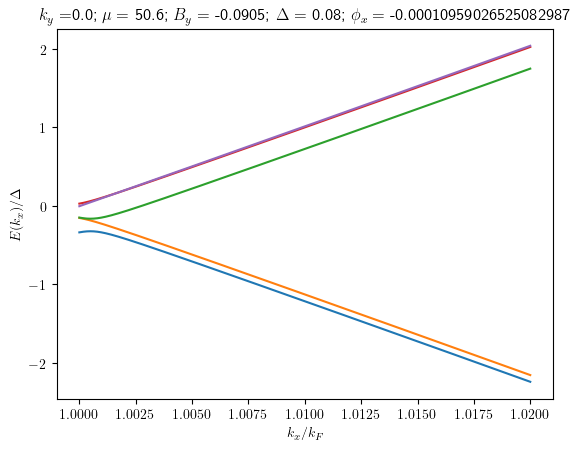

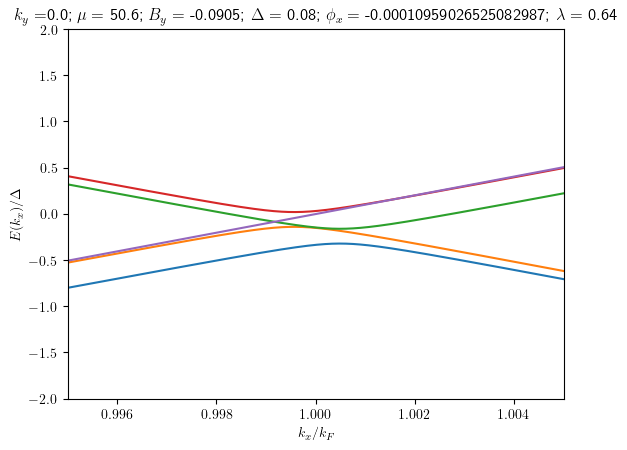

In [24]:
c = 3e18 # nm/s  #3e9 # m/s
m_e =  5.1e8 / c**2 # meV s²/m²
m = 0.403 * m_e # meV s²/m²
hbar = 6.58e-13 # meV s
gamma = hbar**2 / (2*m) # meV (nm)²
E_F = 50.6 # meV
k_F = np.sqrt(E_F / gamma ) # 1/nm

#k_x_values = np.linspace(-1.01, -0.99, 2000) * k_F
#k_x_values = np.linspace(-0.3, -0.1, 2000) * k_F
#k_x_values = np.linspace(-0.5, -0.4, 2000) * k_F
k_x_values = np.linspace(1, 1.02, 2000) * k_F

k_y = 0 * k_F #-0.98 * k_F
Delta = 0.08   #0.08 #0.08   # 0.08 meV
mu = 50.6  #632 * Delta   #50.6  #  meV
B = 1.6 * Delta
theta = -np.pi/4
B_y = B * np.sin(theta)  # 2 * Delta
B_x = B * np.cos(theta)
phi_x = -0.0015 * k_F  #  0.002 * k_F  # 0.002 * k_F
gamma = 9479 # meV (nm)²
Lambda = 8 * Delta # 8 * Delta  #0.644 meV 
Energies = 2*get_Energies(k_x_values, [k_y], mu, B_y, Delta, phi_x, gamma, Lambda)
Analytic_Energies = get_Effective_Analytic_Energy(k_x_values, k_y, mu, B_y, Delta, phi_x, gamma, Lambda)

fig, ax = plt.subplots()
for i in range(4):
    #ax.plot(k_x_values, Analytic_Energies[i, :], linestyle="dashed", linewidth=3)
    ax.plot(k_x_values/k_F, Energies[:, :, i])

##############################################################
ax.plot(k_x_values/k_F, (gamma*k_x_values**2-mu))
##############################################################

ax.set_xlabel(r"$k_x/k_F$")
ax.set_ylabel(r"$E(k_x)/\Delta$")
ax.set_title(r"$k_y=$" + f"{k_y:2}"
             + r"; $\mu=$ " + f"{mu:2}"
             + r"; $B_y=$ " + f"{B_y:.3}"
             + r"; $\Delta=$ " + f"{Delta:.2}"
             + r"; $\phi_x=$ " + f"{phi_x}"
            )
#ax.set_xlim(-1.005, -0.995)
#ax.set_ylim(-2, 2)
#ax.hlines(0, -0.45, -0.41, "k", linestyles="dashed")

#ax.hlines(0, -1.005, -0.995, "k", linestyles="dashed")

k_x_values = np.linspace(0.99, 1.01, 2000) * k_F
Energies = 2*get_Energies(k_x_values, [k_y], mu, B_y, Delta, phi_x, gamma, Lambda)

fig, ax = plt.subplots()
for i in range(4):
    #ax.plot(k_x_values, Analytic_Energies[i, :], linestyle="dashed", linewidth=3)
    ax.plot(k_x_values/k_F, Energies[:, :, i])

##############################################################
ax.plot(k_x_values/k_F, (gamma*k_x_values**2-mu))
##############################################################

ax.set_xlabel(r"$k_x/k_F$")
ax.set_ylabel(r"$E(k_x)/\Delta$")
ax.set_title(r"$k_y=$" + f"{k_y:2}"
             + r"; $\mu=$ " + f"{mu:2}"
             + r"; $B_y=$ " + f"{B_y:.3}"
             + r"; $\Delta=$ " + f"{Delta:.2}"
             + r"; $\phi_x=$ " + f"{phi_x}"
             + r"; $\lambda=$ " + f"{Lambda}"
            )
ax.set_xlim(0.995, 1.005)
ax.set_ylim(-2, 2)
ax.hlines(0, -0.45*k_F, -0.41*k_F, "k", linestyles="dashed")

plt.show()


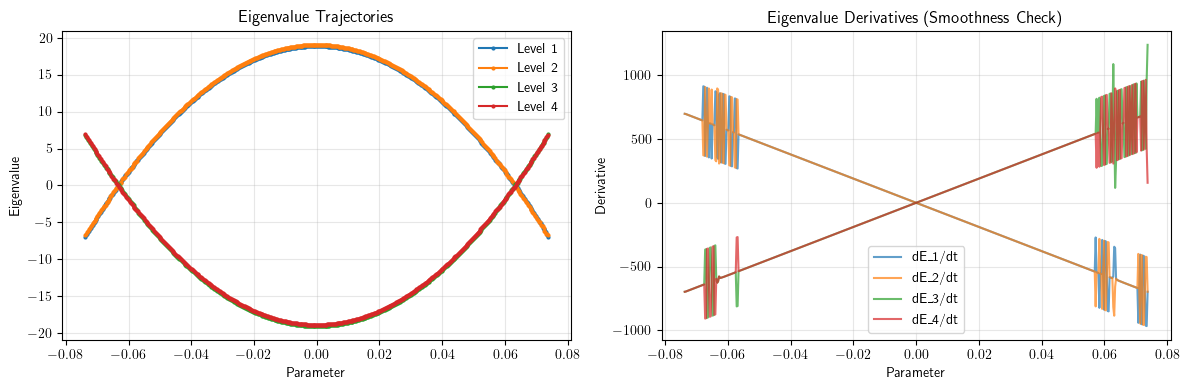

Continuity Analysis:
max_derivative: 1239.037802
mean_derivative: 350.428778
max_second_derivative: 1641993.342199
mean_second_derivative: 97763.015925


In [798]:
from scipy.optimize import linear_sum_assignment
from continous_eigenvalues import continuous_eigenvalues, analyze_continuity

k_x_values = np.linspace(0.99, 1.01, 2000) * k_F
k_y = 0.5*k_F

def demo_hamiltonian(t):
    Delta = 0.08 # meV
    Delta = 0.08   #  meV
    mu = 632 * Delta   #50.6  #  meV
    B = 2*Delta  # 2 * Delta
    phi_x = 0  # 0.002 * k_F
    gamma = 9479 # meV (nm)²
    Lambda = 0 * Delta # 8 * Delta  #0.644 meV 
    return get_Hamiltonian(t, k_y, mu, B, Delta, phi_x, gamma, Lambda)

params, eigenvalues, eigenvectors = continuous_eigenvalues(
    demo_hamiltonian, (-1.01*k_F, 1.01*k_F), continuity_weight=0.4 ,
    lookback=20, smoothness_constraint=True, n_points=500
)

analyze_continuity(eigenvalues, params)


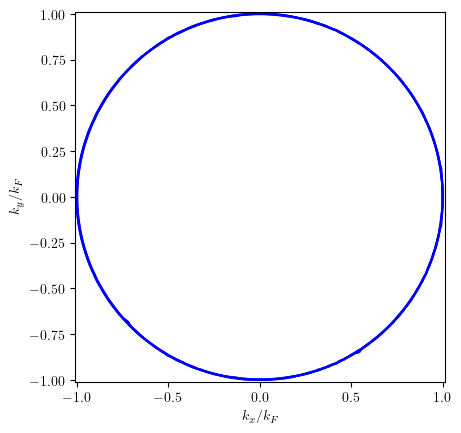

In [909]:
def get_continous_Energies(k_x_values, k_y_values, mu, B, Delta, phi_x, gamma, Lambda):
    """Return the energies of the Hamiltonian at a given k."""
    E = np.zeros((len(k_x_values), len(k_y_values), 4))
    for j, k_y in enumerate(k_y_values):
        def demo_hamiltonian(t):
            Delta = 0.08 # meV
            Delta = 0.08   #  meV
            mu = 632 * Delta   #50.6  #  meV
            B = 2*Delta  # 2 * Delta
            phi_x = 0  # 0.002 * k_F
            gamma = 9479 # meV (nm)²
            Lambda = 0 * Delta # 8 * Delta  #0.644 meV 
            return get_Hamiltonian(t, k_y, mu, B, Delta, phi_x, gamma, Lambda)
        params, eigenvalues, eigenvectors = continuous_eigenvalues(
            demo_hamiltonian, (min(k_x_values), max(k_x_values)), continuity_weight=0.2 ,
            lookback=10, smoothness_constraint=True, n_points=len(k_x_values)
        )            
        E[:, j, :] = eigenvalues
    return E
k_x_values = np.linspace(-1.01, 1.01, 100) * k_F
k_y_values = np.linspace(-1.01, 1.01, 100) * k_F
X, Y = np.meshgrid(k_x_values, k_y_values)

E = get_continous_Energies(k_x_values, k_y_values, mu, B, Delta, phi_x, gamma, Lambda)

fig, ax = plt.subplots()
for i in range(4):
    ax.contour(X/k_F, Y/k_F, E[:,:, i].T, levels=[0.0], colors=["blue"])

ax.set_xlabel("$k_x/k_F$")
ax.set_ylabel("$k_y/k_F$");
ax.set_aspect("equal")


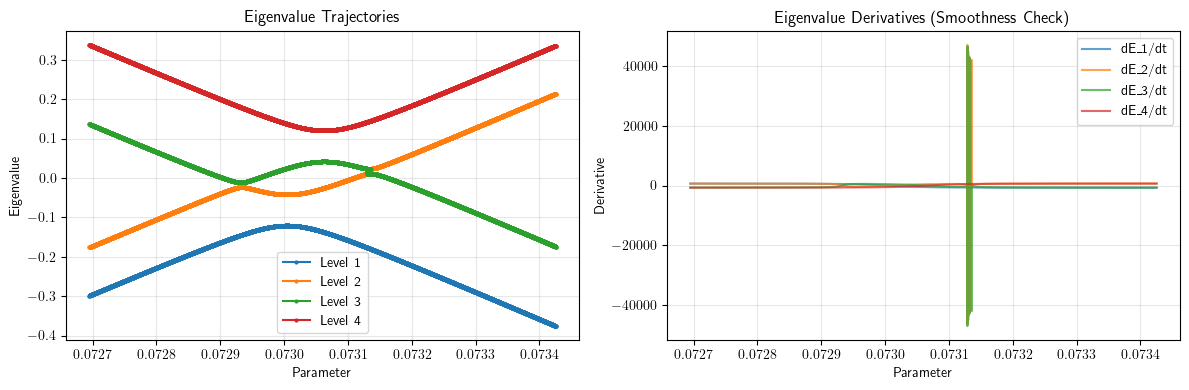

Continuity Analysis:
max_derivative: 47177.276590
mean_derivative: 628.848930
max_second_derivative: 320666933014.940552
mean_second_derivative: 359497400.874390


In [930]:
from scipy.optimize import linear_sum_assignment
from continous_eigenvalues import continuous_eigenvalues, analyze_continuity

k_values = np.linspace(0.995, 1.005, 5000) * k_F
theta = np.pi/6

def demo_hamiltonian(t):
    Delta = 0.08 # meV
    Delta = 0.08   #  meV
    mu = 632 * Delta   #50.6  #  meV
    B = 2*Delta  # 2 * Delta
    phi_x = 0  # 0.002 * k_F
    gamma = 9479 # meV (nm)²
    Lambda = 8 * Delta # 8 * Delta  #0.644 meV 
    return get_Hamiltonian_in_polars(t, theta, mu, B, Delta, phi_x, gamma, Lambda)

params, eigenvalues, eigenvectors = continuous_eigenvalues(
    demo_hamiltonian, (min(k_values), max(k_values)), continuity_weight=0.9 ,
    lookback=2, smoothness_constraint=True, n_points=len(k_values)
)

analyze_continuity(eigenvalues, params)

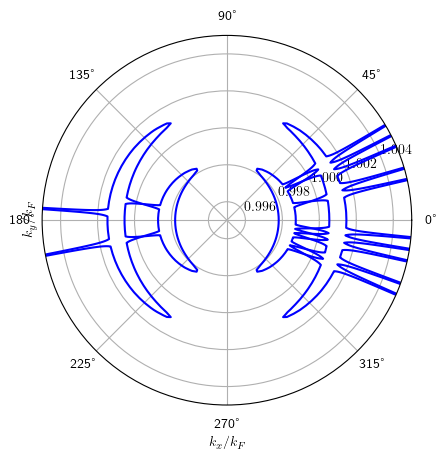

In [932]:
def get_continous_Energies_in_polars(k_values, theta_values, mu, B, Delta, phi_x, gamma, Lambda):
    """Return the energies of the Hamiltonian at a given k."""
    E = np.zeros((len(k_values), len(theta_values), 4))
    for j, theta in enumerate(theta_values):
        def demo_hamiltonian(t):
            Delta = 0.08 # meV
            Delta = 0.08   #  meV
            mu = 632 * Delta   #50.6  #  meV
            B = 2*Delta  # 2 * Delta
            phi_x = 0  # 0.002 * k_F
            gamma = 9479 # meV (nm)²
            Lambda = 8 * Delta # 8 * Delta  #0.644 meV 
            return get_Hamiltonian_in_polars(t, theta, mu, B, Delta, phi_x, gamma, Lambda)
        params, eigenvalues, eigenvectors = continuous_eigenvalues(
            demo_hamiltonian, (min(k_values), max(k_values)), continuity_weight=0.9 ,
            lookback=4, smoothness_constraint=True, n_points=len(k_values)
        )            
        E[:, j, :] = eigenvalues
    return E
k_values = np.linspace(0.995, 1.005, 100) * k_F
theta_values = np.linspace(0, 2*np.pi, 100)
radius, theta = np.meshgrid(k_values, theta_values)

E = get_continous_Energies_in_polars(k_values, theta_values, mu, B, Delta, phi_x, gamma, Lambda)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for i in range(4):
    ax.contour(theta, radius/k_F, E[:,:, i].T, levels=[0.0], colors=["blue"])

ax.set_xlabel("$k_x/k_F$")
ax.set_ylabel("$k_y/k_F$");


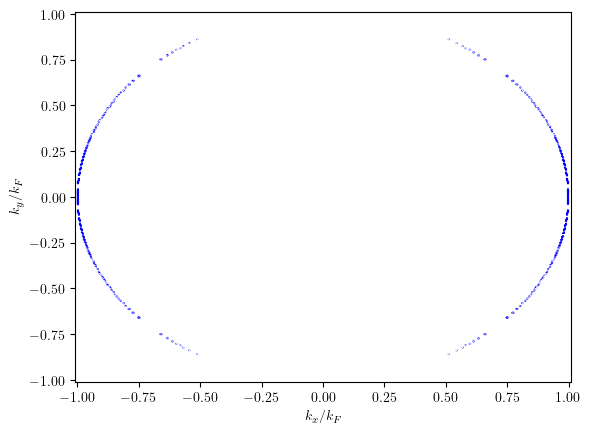

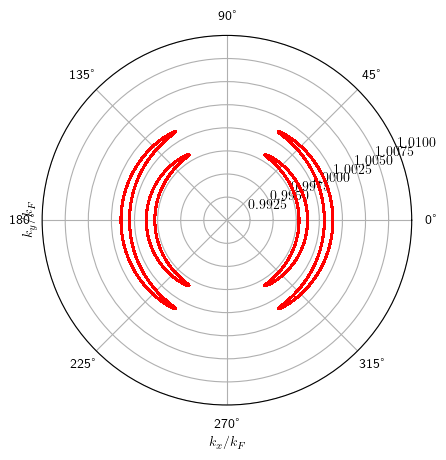

In [933]:
fig, ax = plt.subplots()
k_x_values = np.linspace(-1.01, 1.01, 500) * k_F
#k_x_values = np.linspace(-0.25, 0.25, 500) * k_F
#k_x_values = np.linspace(-1.01, -0.99, 500) * k_F
#k_x_values = np.linspace(-0.7, -0.5, 500) * k_F

k_y_values = np.linspace(-1.01, 1.01, 500) * k_F
#k_y_values = np.linspace(-1.01, -0.95, 500) * k_F
#k_y_values = np.linspace(-0.1, 0.1, 500) * k_F
#k_y_values = np.linspace(-0.9, -0.7, 500) * k_F

X, Y = np.meshgrid(k_x_values, k_y_values)
Energies = get_Energies(k_x_values, k_y_values, mu, B, Delta, phi_x, gamma, Lambda)


for i in range(4):
    #ax.contour(X, Y, get_Effective_Analytic_Energy(X, Y, mu, B, Delta, phi_x, gamma, Lambda)[i],
     #          levels=[0.0],
      #         linestyles="dashed")
    ax.contour(X/k_F, Y/k_F, Energies[:,:, i].T, levels=[0.0], colors=["blue"])
#contour = ax.contour(Y, X, Energies[:,:, 2], levels=[0.0], colors=["red"])
ax.set_xlabel("$k_x/k_F$")
ax.set_ylabel("$k_y/k_F$");


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
radius_values = np.linspace(0.99, 1.01, 500)*k_F
theta_values = np.linspace(0, 2*np.pi, 1000)
radius, theta = np.meshgrid(radius_values, theta_values)
#x = radius_values*np.cos(theta_values)
#y = radius_values*np.sin(theta_values)
#X = radius*np.cos(theta)
#Y = radius*np.sin(theta)
Energies_polar = get_Energies_in_polars(radius_values, theta_values, mu, B, Delta, phi_x, gamma, Lambda)
for i in range(4):
    #ax.contour(X/k_F, Y/k_F, Energies_polar[:,:, i].T, levels=[0.0], colors=["red"])
    ax.contour(theta, radius/k_F, Energies_polar[:,:, i].T, levels=[0.0], colors=["red"],
              antialiased=False)


f = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[2]
g = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[1]
h = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[0]
l = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[3]
roots = find_all_roots(f, x_range=(-1.01*k_F, -0.99*k_F))
roots = np.append(roots, find_all_roots(g, x_range=(-1.01*k_F, -0.99*k_F)))
roots = np.append(roots, find_all_roots(h, x_range=(-1.01*k_F, -0.99*k_F)))
roots = np.append(roots, find_all_roots(l, x_range=(-1.01*k_F, -0.99*k_F)))


#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-(roots[1]/k_F)**2 , levels=[0.0], colors=["red"], linestyles="dotted")
#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-(roots[0]/k_F)**2 , levels=[0.0], colors=["red"], linestyles="dotted")

#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-((roots[0]+phi_x)/k_F)**2 , levels=[0.0], colors=["black"], linestyles="dotted")
#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-((roots[1]-phi_x)/k_F)**2 , levels=[0.0], colors=["black"], linestyles="dotted")

ax.set_xlabel("$k_x/k_F$")
ax.set_ylabel("$k_y/k_F$");
#ax.set_aspect('equal', 'box')
plt.show()


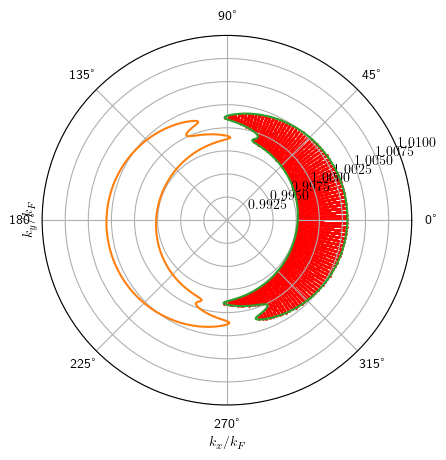

In [25]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
N = 200
#radius_values = np.linspace(0.99, 1.01, N)*k_F
radius_values = np.linspace(0.99, 1.01, N)*k_F

theta_values = np.linspace(-np.pi/2, 3*np.pi/2, N)
radius, theta = np.meshgrid(radius_values, theta_values)

"""
roots = get_roots_at_k_y_zero(mu, B, Delta, phi_x, gamma, Lambda, k_F)
minima_k_value = np.min(abs(roots))
maxima_k_value = np.max(abs(roots))
radius_values = np.linspace(0.999*minima_k_value, 1.001*maxima_k_value, N)
radius, theta = np.meshgrid(radius_values, theta_values)
"""

#x = radius_values*np.cos(theta_values)
#y = radius_values*np.sin(theta_values)
#X = radius*np.cos(theta)
#Y = radius*np.sin(theta)
Energies_polar = get_Energies_in_polars(radius_values, theta_values, mu, B_y, Delta, phi_x, gamma, Lambda, B_x)
contours = []
for i in range(4):
    #ax.contour(X/k_F, Y/k_F, Energies_polar[:,:, i].T, levels=[0.0], colors=["red"])
    values = Energies_polar[:,:, i].T
    contour = ax.contour(theta, radius/k_F, values, levels=[0.0], colors=f"C{i}")
    contours.append(contour)

values = Energies_polar[:,:, 2].T
# Create masks for positive and negative values
mask_positive = values >= 0
mask_negative = values < 0

# Plot negative values in another color
ax.scatter(theta[mask_negative], radius[mask_negative]/k_F, color='red', label='Negative Values',
           s=1)


"""
f = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[2]
g = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[1]
h = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[0]
l = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[3]
roots = find_all_roots(f, x_range=(-1.01*k_F, -0.99*k_F))
roots = np.append(roots, find_all_roots(g, x_range=(-1.01*k_F, -0.99*k_F)))
roots = np.append(roots, find_all_roots(h, x_range=(-1.01*k_F, -0.99*k_F)))
roots = np.append(roots, find_all_roots(l, x_range=(-1.01*k_F, -0.99*k_F)))
"""

#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-(roots[1]/k_F)**2 , levels=[0.0], colors=["red"], linestyles="dotted")
#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-(roots[0]/k_F)**2 , levels=[0.0], colors=["red"], linestyles="dotted")

#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-((roots[0]+phi_x)/k_F)**2 , levels=[0.0], colors=["black"], linestyles="dotted")
#ax.contour(X/k_F, Y/k_F, (X/k_F)**2 + (Y/k_F)**2-((roots[1]-phi_x)/k_F)**2 , levels=[0.0], colors=["black"], linestyles="dotted")

ax.set_xlabel("$k_x/k_F$")
ax.set_ylabel("$k_y/k_F$");
#ax.set_aspect('equal', 'box')
plt.show()

In [1333]:
print(mask_negative==False)

True


In [1300]:
roots

array([-0.07309876, -0.07309359, -0.07303124, -0.07302608,  0.07302608,
        0.07303124,  0.07309359,  0.07309876])

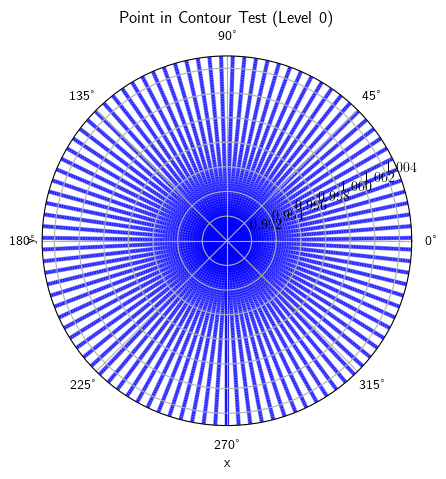

In [1324]:
from matplotlib.path import Path

CS = contours[2]
# Extract the segments and create paths
paths_by_level = {}
for i, level_segs in enumerate(CS.allsegs):
    level = CS.levels[i]
    if level not in paths_by_level:
        paths_by_level[level] = []
    
    # Check if the segment is a closed loop
    for seg in level_segs:
        is_closed = np.all(seg[0] == seg[-1])
        # Only use closed paths for point-in-polygon tests
        if is_closed and len(seg) > 2:
            # Interpolate the segment to smooth the path
            distance = np.cumsum(np.sqrt(np.diff(seg[:,0])**2 + np.diff(seg[:,1])**2))
            distance = np.insert(distance, 0, 0)
            
            num_interp_points = 200
            new_distances = np.linspace(0, distance[-1], num_interp_points)
            interp_x = interp1d(distance, seg[:, 0], kind='cubic')
            interp_y = interp1d(distance, seg[:, 1], kind='cubic')
            
            interp_seg = np.vstack((interp_x(new_distances), interp_y(new_distances))).T
            
            # Create a path from the interpolated segment
            paths_by_level[level].append(Path(interp_seg))

def is_inside_contour(points, contour_level, paths_by_level_dict):
    """
    Checks if a list of (x,y) points are inside the specified contour level.

    Args:
        points (list or np.ndarray): A list of (x, y) coordinates.
        contour_level (float): The contour level to check against.
        paths_by_level_dict (dict): The dictionary of Path objects.

    Returns:
        np.ndarray: A boolean mask indicating if each point is inside.
    """
    # Check if the requested level exists
    if contour_level not in paths_by_level_dict:
        raise ValueError(f"Contour level {contour_level} not found.")

    all_paths_for_level = paths_by_level_dict[contour_level]
    
    if not all_paths_for_level:
        return np.zeros(len(points), dtype=bool)

    points = np.asarray(points)
    
    # The final mask is the OR of all individual path checks
    is_inside_mask = np.zeros(len(points), dtype=bool)
    for path in all_paths_for_level:
        is_inside_mask |= path.contains_points(points)
        
    return is_inside_mask

# Generate a grid of points to test
test_x = np.linspace(-np.pi/2, 3*np.pi/2, 100)
test_y = np.linspace(0.99, 1.01, 100)
TestX, TestY = np.meshgrid(test_x, test_y)
test_points = np.vstack((TestX.ravel(), TestY.ravel())).T

# Get the mask for the 0.5 contour level
contour_level_to_test = 0
is_inside = is_inside_contour(test_points, contour_level_to_test, paths_by_level)


# Create a color mask for plotting
color_mask = np.where(is_inside, 'red', 'blue')
# Plot the results
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title(f'Point in Contour Test (Level {contour_level_to_test})')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Draw the interpolated contour
for path in paths_by_level[contour_level_to_test]:
    ax.plot(path.vertices[:, 0], path.vertices[:, 1], 'g-', linewidth=2)

# Plot the test points
ax.scatter(test_points[:, 0], test_points[:, 1], c=color_mask, s=5, alpha=0.5)

ax.set_ylim(0.99, 1.005) 
plt.show()

In [1319]:
Energies_polar<=0

array([[[ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False],
        ...,
        [ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False]],

       [[ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False],
        ...,
        [ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False]],

       [[ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False],
        ...,
        [ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False]],

       ...,

       [[ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False],
        ...,
        [ True,  True, False, False],
        [ True,  True, False, False],
        [ True,  True, False, False]],

       [[ True,

In [1173]:
import scipy.integrate

contour_level_to_test = 0
is_inside = is_inside_contour(test_points, contour_level_to_test, paths_by_level)

integrand_polar = lambda theta, r: get_Energies_in_polars([r], [theta], mu, B, Delta, phi_x, gamma, Lambda)[0][0][2] * is_inside_contour([[theta, r]], contour_level_to_test, paths_by_level)
#integrand_polar = lambda theta, r: get_Energies_in_polars([r], [theta], mu, B, Delta, phi_x, gamma, Lambda)[0][0][2]

radius_values = np.linspace(0.99, 1.01, 100)
theta_values = np.linspace(-np.pi/2, 3*np.pi/2, 100)
radius, theta = np.meshgrid(radius_values, theta_values)

Z = np.zeros((len(radius_values), len(theta_values)))
for i, r in enumerate(radius_values):
    for j, theta in enumerate(theta_values):
        Z[i, j] = integrand_polar(theta, r)[0]

# Integrate with respect to y first
inner_integral = scipy.integrate.trapezoid(Z, radius_values, axis=0)

# Integrate the result with respect to x
double_integral = scipy.integrate.trapezoid(inner_integral, theta_values, axis=0)
double_integral

# Integrate with respect to y first
inner_integral = scipy.integrate.trapezoid(Z, theta_values, axis=0)

# Integrate the result with respect to x
double_integral = scipy.integrate.trapezoid(inner_integral, radius_values, axis=0)
double_integral


np.float64(0.0)

In [1294]:
def get_roots_at_k_y_zero(mu, B, Delta, phi_x, gamma, Lambda, k_F):
    """
    Returns an ndarray with all the roots at k_y=0.
    """
    f = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[2]
    g = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[1]
    h = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[0]
    l = lambda x: get_Analytic_energies_at_k_y_zero(x, mu, B, Delta, phi_x, gamma, Lambda)[3]
    roots = find_all_roots(f, x_range=(-1.01*k_F, -0.99*k_F))
    roots = np.append(roots, find_all_roots(g, x_range=(-1.01*k_F, -0.99*k_F)))
    roots = np.append(roots, find_all_roots(h, x_range=(-1.01*k_F, -0.99*k_F)))
    roots = np.append(roots, find_all_roots(l, x_range=(-1.01*k_F, -0.99*k_F)))
    roots = np.append(roots, find_all_roots(f, x_range=(0.99*k_F, 1.01*k_F)))
    roots = np.append(roots, find_all_roots(g, x_range=(0.99*k_F, 1.01*k_F)))
    roots = np.append(roots, find_all_roots(h, x_range=(0.99*k_F, 1.01*k_F)))
    roots = np.append(roots, find_all_roots(l, x_range=(0.99*k_F, 1.01*k_F)))
    return roots
